# 1.  Linear-Regression Model 
using scikit-learning

In [7]:
%matplotlib inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [9]:
random_data = np.random.random((20,2))

In [10]:
random_data

array([[0.95166141, 0.65514331],
       [0.96312373, 0.44947858],
       [0.93161677, 0.21291124],
       [0.97796248, 0.31634203],
       [0.19881273, 0.79188116],
       [0.48300218, 0.63377124],
       [0.33022565, 0.38330408],
       [0.98757335, 0.58677521],
       [0.36133548, 0.75897771],
       [0.03893488, 0.94493993],
       [0.65859343, 0.29524457],
       [0.17628776, 0.43381769],
       [0.7741466 , 0.82326163],
       [0.55336783, 0.82393762],
       [0.69570631, 0.6233019 ],
       [0.72105934, 0.3691726 ],
       [0.05098701, 0.74717803],
       [0.75867813, 0.11691895],
       [0.0763269 , 0.21628269],
       [0.01590799, 0.64063908]])

In [11]:
X = random_data[:,0]

In [12]:
y = random_data[:,1]

In [13]:
def assuming_function(x):
    return 13.4*x+5+random.randint(-5,5)

In [14]:
y=[assuming_function(x) for x in X]

In [15]:
print(y)

[21.752262920445375, 22.905857939399695, 22.483664701818395, 15.104697244410978, 6.664090593183903, 7.472229147705878, 12.425023733278133, 20.23348284552401, 8.841895440292008, 3.5217273542710137, 15.82515200700963, 11.362255983557237, 10.373564431497988, 16.415128978492127, 14.322464584093451, 14.662195170592664, 2.6832259506714617, 20.16628690758878, 7.022780524553949, 7.21316704123334]


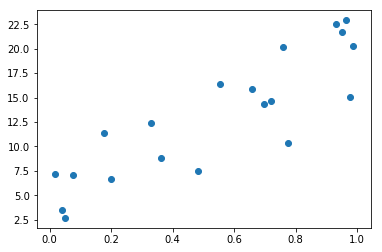

In [16]:
plt.scatter(X,y)

In [17]:
y = np.array(y)

In [18]:
print(y)

[21.75226292 22.90585794 22.4836647  15.10469724  6.66409059  7.47222915
 12.42502373 20.23348285  8.84189544  3.52172735 15.82515201 11.36225598
 10.37356443 16.41512898 14.32246458 14.66219517  2.68322595 20.16628691
  7.02278052  7.21316704]


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg = LinearRegression().fit(X.reshape(-1,1),y)

In [21]:
reg.score(X.reshape(-1,1),y)

0.7601697108535762

In [22]:
reg.coef_

array([15.59818661])

In [23]:
reg.intercept_

4.723386550418372

In [24]:
def f(x):
    return reg.coef_*x+reg.intercept_

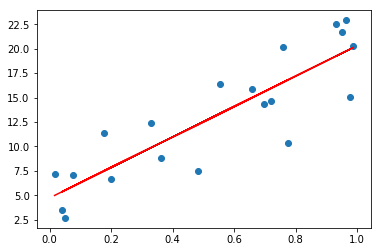

In [25]:
plt.scatter(X,y)
plt.plot(X,f(X),color='red')

In [26]:
X

array([0.95166141, 0.96312373, 0.93161677, 0.97796248, 0.19881273,
       0.48300218, 0.33022565, 0.98757335, 0.36133548, 0.03893488,
       0.65859343, 0.17628776, 0.7741466 , 0.55336783, 0.69570631,
       0.72105934, 0.05098701, 0.75867813, 0.0763269 , 0.01590799])

In [27]:
reg.predict(X.reshape(-1,1))

array([19.56757884, 19.74637017, 19.25491876, 19.97782782,  7.82450463,
       12.25734461,  9.87430789, 20.1277399 , 10.35956481,  5.33070003,
       14.99624982,  7.47315593, 16.79866967, 13.35492129, 15.57514343,
       15.97060471,  5.51869147, 16.55738956,  5.91394785,  4.97152232])

# 2.  KNN model

**Step1：定义模型**

In [28]:
def model(X,y):
    return [(Xi,yi) for Xi,yi in zip(X,y)]

**Step2：定义距离**

In [29]:
from scipy.spatial.distance import cosine

In [30]:
def distance(x1,x2):
    return cosine(x1,x2)

**Step3：预测k个最近邻**

In [31]:
def predict_neighbor(x,k=5):
    most_similars = sorted(model(X,y),key=lambda xi:distance(xi[0],x))[:k]
    return most_similars

In [32]:
myself_knn = model(X,y)

In [35]:
most_similars = predict_neighbor(0.9)
most_similars

[(0.9316167687924175, 22.483664701818395),
 (0.9516614119735355, 21.752262920445375),
 (0.9631237268208729, 22.905857939399695),
 (0.9779624809261924, 15.104697244410978),
 (0.1988127308346196, 6.664090593183903)]

**Step4：预测结果**

In [37]:
def predict(x):
    most_similars = predict_neighbor(x,k=5)
    return most_similars[0][1]

In [38]:
predict(0.9)

22.483664701818395

# 3.  Decision Tree

**1.信息熵：**<br>
$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$
**2.Gini纯度：**<br>
$$ Gini = 1 - \sum_{i=1}^J P_i^2  $$

In [4]:
from collections import Counter
from icecream import ic
import numpy as np

In [5]:
#信息熵
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c]/len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [6]:
entropy([1,1,1,1]) #分布均匀，entropy=1

ic| probs: [1.0]


-0.0

In [7]:
entropy([1,2,3,4]) #分布最乱

ic| probs: [0.25, 0.25, 0.25, 0.25]


1.3862943611198906

**决策树怎么来决定，哪一个特征来进行分割呢？**

In [8]:
import pandas as pd

In [9]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [10]:
type(mock_data)

dict

In [11]:
dataset = pd.DataFrame.from_dict(mock_data)

In [12]:
dataset

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
2,F,+10,2,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0
6,M,-10,2,1,1


In [13]:
# split_by_gender: 
print(entropy([1, 1, 1, 0]) + entropy([0, 0, 1]))

# split_by_income:
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_family_number
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_some_feature: 
print(entropy([1, 1, 1, 1]) + entropy([0, 0, 0]))

ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]


1.198849312913621
0.6730116670092565
0.6730116670092565
-0.0


**决策树在选择决策过程，决策顺序的时候，其实是按照，根据这个特征，进行分割之后，数据的熵最少原则进行的。**


In [14]:
set(mock_data['family_number'])

{1, 2}

In [15]:
set(mock_data['gender'])

{'F', 'M'}

按family_number分：

In [16]:
sub_split_1=dataset[dataset['family_number']==1]['bought'].tolist()

In [17]:
sub_split_1

[1, 1, 0, 0, 0]

In [18]:
sub_split_2=dataset[dataset['family_number']!=1]['bought'].tolist()

In [19]:
sub_split_2

[1, 1]

In [20]:
entropy(sub_split_1)+entropy(sub_split_2)

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

按gender分：

In [21]:
_sub_split_1 = dataset[dataset['gender']!='F']['bought'].tolist()

In [22]:
_sub_split_1

[0, 0, 1]

In [23]:
_sub_split_2 = dataset[dataset['gender']=='F']['bought'].tolist()

In [24]:
_sub_split_2

[1, 1, 1, 0]

In [25]:
entropy(_sub_split_1)+entropy(_sub_split_2)

ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.25, 0.75]


1.198849312913621

**寻找最优分割方法：**

In [26]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target:str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            #sub_spliter_1
            sub_spliter_1 = training_data[training_data[f]== v][target].tolist()
            ic(sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            #sub_spliter_2
            sub_spliter_2 = training_data[training_data[f]!= v][target].tolist()
            ic(sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            #the sum of entropy
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            #compare
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
        ic(min_entropy)
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy)) 
    return spliter
        

In [27]:
find_the_optimal_spilter(training_data=dataset,target='bought')

ic| f: 'pet'
ic| values: {0, 1}
ic| sub_spliter_1: [0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: -0.0
ic| sub_spliter_1: [1, 1, 1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [0, 0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: -0.0
ic| min_entropy: -0.0
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| min_entropy: -0.0
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0

# 4.  K-Means

In [69]:
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt

In [70]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

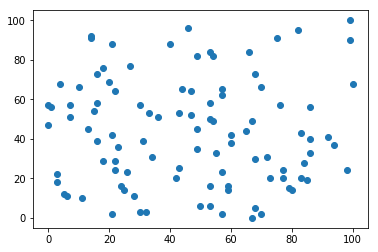

In [71]:
plt.scatter(X1,X2)

In [72]:
training_data = [[x1,x2] for x1,x2 in zip(X1,X2)]

In [75]:
cluster = KMeans(n_clusters=6,max_iter=500)

In [77]:
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
cluster.cluster_centers_

array([[22.09090909, 20.86363636],
       [88.5       , 42.7       ],
       [13.42105263, 65.57894737],
       [51.61111111, 50.44444444],
       [67.73684211, 14.89473684],
       [66.75      , 85.91666667]])

In [80]:
cluster.labels_

array([2, 2, 0, 3, 0, 0, 3, 2, 0, 0, 0, 2, 3, 4, 4, 4, 5, 0, 0, 2, 0, 3,
       2, 5, 4, 4, 5, 3, 3, 2, 0, 0, 5, 3, 1, 3, 4, 2, 0, 5, 0, 1, 0, 1,
       4, 2, 3, 5, 3, 2, 5, 0, 2, 4, 5, 3, 3, 0, 4, 0, 2, 1, 4, 3, 1, 3,
       1, 4, 4, 2, 4, 5, 3, 1, 4, 1, 3, 0, 2, 4, 2, 0, 5, 4, 0, 1, 2, 2,
       2, 5, 3, 3, 4, 5, 2, 0, 4, 4, 0, 1])

画图：

In [81]:
from collections import defaultdict

In [82]:
centers = defaultdict(list)

In [87]:
for label,location in zip(cluster.labels_,training_data):
    centers[label].append(location)

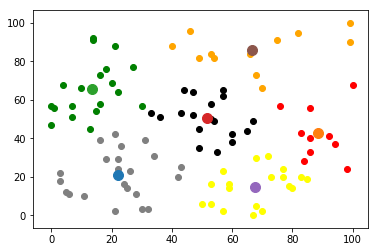

In [89]:
color = ['red','green', 'grey', 'black', 'yellow', 'orange']
for i,c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location,c=color[i])
for center in cluster.cluster_centers_:
    plt.scatter(*center,s=100)